# Session 6B Coding Co-lab

[session link](https://eds-217-essential-python.github.io/course-materials/coding-colabs/6b_advanced_data_manipulation.html)

## Setup

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the temperature anomaly dataset
temp_url = "https://bit.ly/monthly_temp"
temp_df = pd.read_csv(temp_url, parse_dates=['Date'])

# Load the CO2 concentration dataset
co2_url = "https://bit.ly/monthly_CO2"
co2_df = pd.read_csv(co2_url, parse_dates=['Date'])

print("Temperature data:")
print(temp_df.head())
print("\nCO2 data:")
print(co2_df.head())

Temperature data:
        Date  MonthlyAnomaly
0 1880-01-01           -0.20
1 1880-02-01           -0.25
2 1880-03-01           -0.09
3 1880-04-01           -0.16
4 1880-05-01           -0.09

CO2 data:
        Date  CO2Concentration
0 1958-04-01            317.45
1 1958-05-01            317.51
2 1958-06-01            317.27
3 1958-07-01            315.87
4 1958-08-01            314.93


## 1. Data Preparation

In [104]:
# Set the date as the column index for both dfs
temp_df = temp_df.set_index('Date')
co2_df.set_index('Date', inplace=True)

In [18]:
# check for NAs
print(temp_df.isnull().sum())
print(co2_df.isnull().sum())

MonthlyAnomaly    0
dtype: int64
CO2Concentration    0
dtype: int64


## 2. Joining Datasets


In [105]:
# Merge temp and co2 based on date index
merge_df = pd.merge(temp_df, co2_df, on='Date', how='inner')
print(merge_df)

            MonthlyAnomaly  CO2Concentration
Date                                        
1958-04-01            0.01            317.45
1958-05-01            0.06            317.51
1958-06-01           -0.08            317.27
1958-07-01            0.05            315.87
1958-08-01           -0.05            314.93
...                    ...               ...
2024-03-01            1.40            425.38
2024-04-01            1.32            426.57
2024-05-01            1.16            426.90
2024-06-01            1.25            426.91
2024-07-01            1.21            425.55

[796 rows x 2 columns]


In [22]:
# check for NAs introduced by the merge
merge_df.isnull().sum()

MonthlyAnomaly      0
CO2Concentration    0
dtype: int64

<Axes: xlabel='Date'>

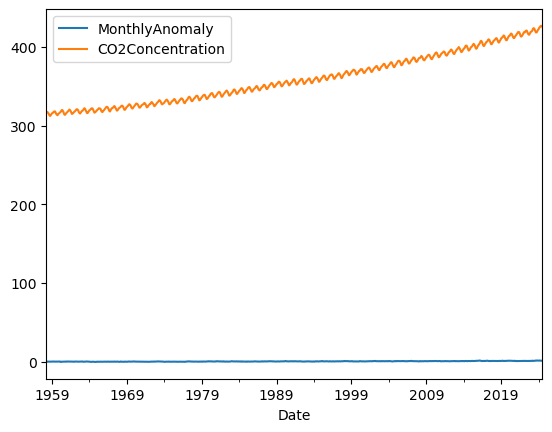

In [37]:
# Create some plots showing temperature anomalies and CO2 concentrations over time using pandas built-in plotting functions.
merge_df.plot()


<Axes: xlabel='Date'>

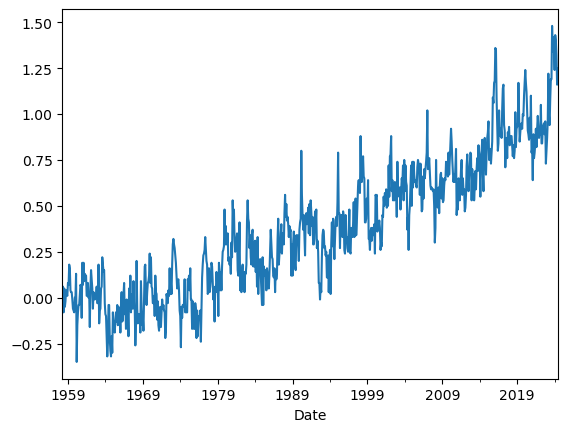

In [38]:
merge_df['MonthlyAnomaly'].plot()

<Axes: xlabel='Date'>

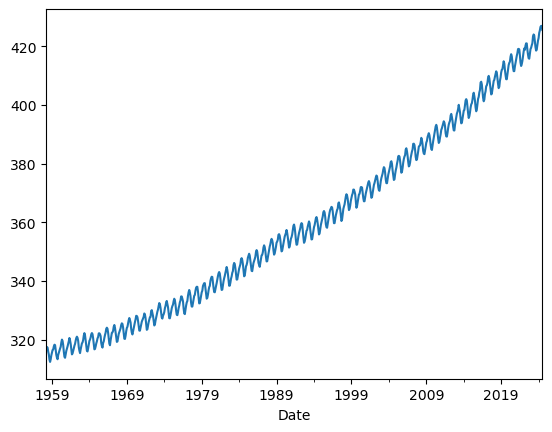

In [39]:
merge_df['CO2Concentration'].plot()

## 3. Time Series Analysis


In [106]:
# Resample the data to annual averages.

yearly_counts = merge_df.resample('YE')[['MonthlyAnomaly', 'CO2Concentration']].mean()
print(yearly_counts)
print(merge_df)

            MonthlyAnomaly  CO2Concentration
Date                                        
1958-12-31        0.004444        315.184444
1959-12-31        0.030833        315.981667
1960-12-31       -0.025000        316.908333
1961-12-31        0.057500        317.643333
1962-12-31        0.030833        318.453333
...                    ...               ...
2020-12-31        1.009167        414.214167
2021-12-31        0.848333        416.414167
2022-12-31        0.893333        418.528333
2023-12-31        1.169167        421.075833
2024-12-31        1.287143        425.522857

[67 rows x 2 columns]
            MonthlyAnomaly  CO2Concentration
Date                                        
1958-04-01            0.01            317.45
1958-05-01            0.06            317.51
1958-06-01           -0.08            317.27
1958-07-01            0.05            315.87
1958-08-01           -0.05            314.93
...                    ...               ...
2024-03-01            1.40      

In [115]:
# def slope(column1, column2):
#     for n in column1:
#         slope_x = column1[n+1] - column1[n]
#         return slope_x
#     for n in column2:
#         slope_y = column2[n+1] - column2[n]
#         return slope_y
#     return (slope_y / slope_x)

In [116]:
# Calculate the year-over-year change in temperature anomalies and CO2 concentrations.

yearly_counts.diff()

,MonthlyAnomaly,CO2Concentration
Date,,
1958-12-31,NaN,NaN
1959-12-31,0.026389,0.797222
1960-12-31,-0.055833,0.926667
1961-12-31,0.082500,0.735000
1962-12-31,-0.026667,0.810000
...,...,...
2020-12-31,0.033333,2.565000
2021-12-31,-0.160833,2.200000
2022-12-31,0.045000,2.114167


To use .apply on the index, it means there's a special way to access index values in .apply



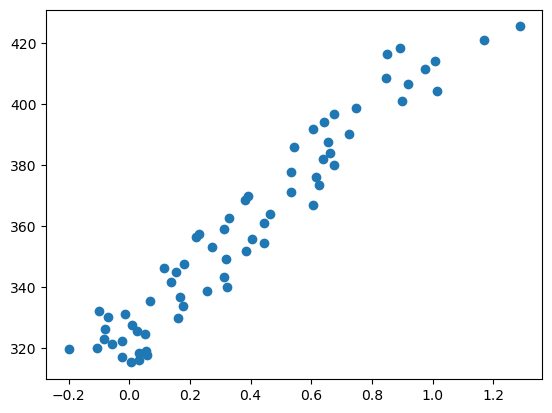

In [55]:
# Create a scatter plot (use the plt.scatter() function) of annual temperature anomalies vs CO2 concentrations.
plt.scatter(x=yearly_counts['MonthlyAnomaly'], y=yearly_counts['CO2Concentration'])

## 4. Seasonal Analysis
Pass month number in date index/time series, assign season for each month


  elif (df.index.month >= 9) & (df.index.date.month <= 11):
        print("Fall")

In [112]:
# Create a function to extract the season from a given date (hint: use the date.month attribute and if-elif-else to assign the season in your function).

def find_season(df):
    if ((df.month == 12) | (df.month <= 2)):
        return("Winter")
        
    elif ((df.month >= 3) & (df.month <= 5)):
        return("Spring")
        
    elif ((df.month >= 6) & (df.month <= 8)):
        return("Summer") 
        
    else:
        return("Fall")

In [120]:
# Use the function to create a new column called Season

merge_df['Season'] = merge_df.index.to_series().apply(find_season)
print(merge_df.head())

            MonthlyAnomaly  CO2Concentration  Season
Date                                                
1958-04-01            0.01            317.45  Spring
1958-05-01            0.06            317.51  Spring
1958-06-01           -0.08            317.27  Summer
1958-07-01            0.05            315.87  Summer
1958-08-01           -0.05            314.93  Summer


In [117]:
# Calculate the average temperature anomaly and CO2 concentration for each season.

merge_df.groupby('Season').agg({
    'MonthlyAnomaly': 'mean',
    'CO2Concentration': 'mean'
})

,MonthlyAnomaly,CO2Concentration
Season,,
Fall,0.361414,356.246970
Spring,0.398000,361.802900
Summer,0.355250,359.830200
Winter,0.389747,359.467576


<Axes: xlabel='Season', ylabel='MonthlyAnomaly'>

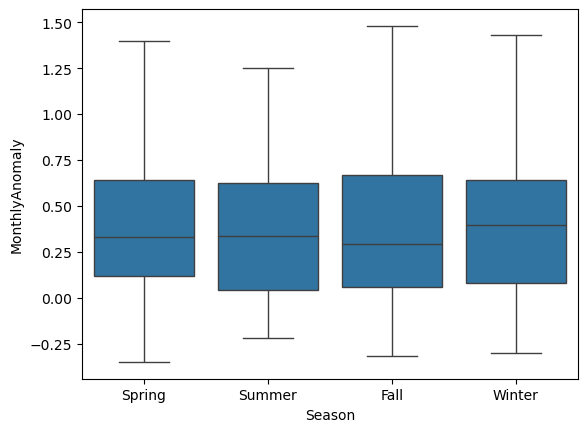

In [119]:
# Create a box plot (use sns.boxplot) showing the distribution of temperature anomalies for each season

sns.boxplot(x = merge_df['Season'], y = merge_df['MonthlyAnomaly'])

### Using apply() on an index

Just use the `to_series()` method of the index object then pass that to your `apply()` command

In [100]:
# def fun(value):
#     return value

# # merged['myfun'] = merged.index.apply(fun) #error
# # date time index has no attribute called apply

# # how do we fix this?
# merged['myfun'] = merged.index.to_series().apply(fun) 
